In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets.samples_generator import make_blobs
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression

#working for PoC code / Aref / not pretty code / not for Prod






In [2]:
calhouse = pd.read_csv('e-100.csv')
calhouse.head()

,id,tsunami,year,eq,region,deaths
0,10330.0,0.0,2018.0,2.1,10.0,7.0
1,10293.0,0.0,2018.0,3.4,120.0,0.0
2,10331.0,0.0,2018.0,4.1,120.0,5.0
3,10327.0,0.0,2018.0,4.4,60.0,3.0
4,10326.0,0.0,2018.0,4.7,130.0,0.0


In [3]:


X = calhouse[["eq", "year", "region"]]
y = calhouse["deaths"].values.reshape(-1, 1)
print(X.shape, y.shape)
A=X
b=y
X

(100, 3) (100, 1)


,eq,year,region
0,2.1,2018.0,10.0
1,3.4,2018.0,120.0
2,4.1,2018.0,120.0
3,4.4,2018.0,60.0
4,4.7,2018.0,130.0
5,4.9,2018.0,160.0
6,4.9,2018.0,130.0
7,4.9,2018.0,160.0
8,5.0,2018.0,140.0
9,5.0,2018.0,30.0


# Multiple Linear Regression

Multiple Linear Regression simply means that you have more than one feature variable.

For the Housing Price example, you may have features like this:

$Y_i$ = $Bias_0$ + $Weight_1$ sq_feet + $Weight_2$ num_bedrooms + $Weight_3$ num_bathrooms

Note: The weights are how important each feature is to the equation. This is the part that the algorithm has to learn.

The generic formula is:

$Y_i = Bias_0 + Weight_1 Feature_1 + Weight_2 Feature_2 + \ldots + Weight_p Feature_p$

The equation is often written as:

$Y_i = \theta_0 + \theta_1 X_{i1} + \theta_2 X_{i2} + \ldots + \theta_p X_{ip}$

Generate a linear dataset with 3 features

In [4]:
from sklearn.datasets import make_regression

#n_features = 3
#X, y = make_regression(n_samples=30, n_features=n_features, 
#                     n_informative=n_features, random_state=42, 
#                       noise=0.5, bias=100.0)

print(X.shape)
df = pd.DataFrame(data=X)
#del df['index']

print (df)


(100, 3)
     eq    year  region
0   2.1  2018.0    10.0
1   3.4  2018.0   120.0
2   4.1  2018.0   120.0
3   4.4  2018.0    60.0
4   4.7  2018.0   130.0
5   4.9  2018.0   160.0
6   4.9  2018.0   130.0
7   4.9  2018.0   160.0
8   5.0  2018.0   140.0
9   5.0  2018.0    30.0
10  5.1  2018.0    30.0
11  5.2  2018.0    60.0
12  5.2  2018.0    60.0
13  5.2  2018.0   140.0
14  5.3  2018.0    40.0
15  5.3  2018.0    60.0
16  5.3  2018.0   140.0
17  5.3  2018.0   140.0
18  5.5  2018.0   140.0
19  5.5  2018.0    30.0
20  5.5  2018.0   140.0
21  5.6  2018.0    30.0
22  5.6  2018.0   100.0
23  5.6  2018.0    30.0
24  5.8  2018.0    60.0
25  5.9  2018.0    60.0
26  5.9  2018.0    90.0
27  5.9  2018.0   140.0
28  6.0  2018.0    60.0
29  6.0  2018.0   140.0
..  ...     ...     ...
70  5.6  2017.0   160.0
71  5.6  2017.0    10.0
72  5.7  2017.0   170.0
73  5.7  2017.0    60.0
74  5.7  2017.0   130.0
75  5.7  2017.0   170.0
76  5.8  2017.0   140.0
77  5.9  2017.0   170.0
78  5.9  2017.0   170.0
79  6.0

In [5]:
#X=X.values


With 3 or more dimensions, it becomes harder to visualize the linear trends in our data

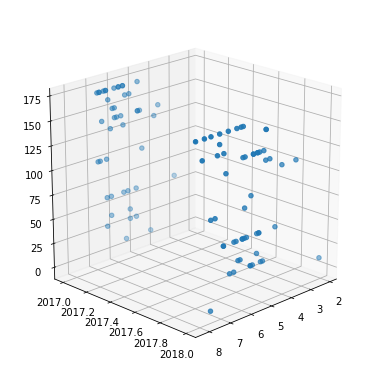

In [6]:
from mpl_toolkits.mplot3d import Axes3D
X=X.values
fig = plt.figure(1, figsize=(5, 5))
axes = Axes3D(fig, elev=20, azim=45)
axes.scatter(X[:,0], X[:,1], X[:,2], cmap=plt.cm.get_cmap("Spectral"))
plt.show()

We can still visualize 3 features as a 3D plot, but what about n-dimensions? This becomes very difficult for the human brain to visualize. 

We could pick just one feature from X to fit our model, but what we really want it to find a line that best fits the data in n-dimensional space. To achieve this, Linear Regression can be solved using the analytical approach called [Ordinary Least Squares](https://en.wikipedia.org/wiki/Ordinary_least_squares) or a computational approach [Gradient Descent](https://en.wikipedia.org/wiki/Gradient_descent) for estimating the parameters. Note that there are [tradeoffs](https://stats.stackexchange.com/questions/23128/solving-for-regression-parameters-in-closed-form-vs-gradient-descent) between using either approach. The Linear Regression model in Sklearn uses the Ordinary Least Squares method.

Luckily, we can just supply our n-dimensional features and sklearn will fit the model using all of our features.

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(X, y)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [8]:
score = model.score(X, y)
print(f"R2 Score: {score}")

R2 Score: 0.11341430229663264


## Residuals

Because we can't easily plot our line in 3D space, we can use a residual plot to check our predictions.

Residuals are the difference between the true values of y and the predicted values of y.

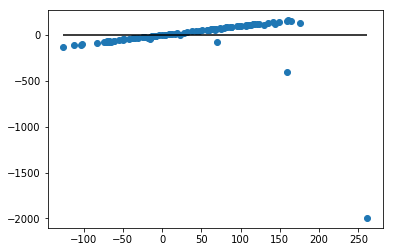

In [9]:
predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

In [10]:
#We want our predictions to be close to zero on the y-axis in this plot.

In [11]:
#ELASTICNET ANALYSIS

In [12]:
#X, y = make_regression(n_features=2, random_state=0)
# A and b are same as X and y

regr = ElasticNet(random_state=0)

#n12 = np.squeeze(np.asarray(n2))

#X12 = np.squeeze(np.asarray(x1))

regr.fit(A, b)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=0, selection='cyclic', tol=0.0001, warm_start=False)
      
print(regr.coef_) 

print(regr.intercept_) 

#print(regr.predict([[0,0]])) 

[38.61933547  9.24781432 -1.06896158]
[-18736.25924717]
